In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [172]:
data2 = pd.read_csv("data2.csv")
data2

,과,외래,입원,사망
0,내과,428584,647440,5517
1,외과,85277,139906,457
2,산부인과,34116,34522,26
3,소아청소년과,441011,133191,118
4,정형외과,276973,187786,107
5,신경외과,86063,143620,566
6,치과,20644,1356,2
7,안과,53286,4351,0
8,이비인후과,82635,18816,11
9,정신건강의학과,18400,6987,3


### 외래

In [151]:
data3_1=data3.rename(columns = {'외래':'p'})
data3_1

,과,p,입원,사망
0,내과,428584,647440,5517
1,외과,85277,139906,457
2,소아청소년과,441011,133191,118
3,정형외과,276973,187786,107
4,응급의학과,6889265,319164,24505
5,기타,68739,21129,183


In [152]:
def to_int(p):
    p=p.replace(',','')
    p=int(p)
    return p

In [154]:
p_int = data3_1.p.apply(to_int)
p_int.head()

0     428584
1      85277
2     441011
3     276973
4    6889265
Name: p, dtype: int64

In [155]:
data3_1.insert(1,'외래',p_int)
data3_1

,과,외래,p,입원,사망
0,내과,428584,428584,647440,5517
1,외과,85277,85277,139906,457
2,소아청소년과,441011,441011,133191,118
3,정형외과,276973,276973,187786,107
4,응급의학과,6889265,6889265,319164,24505
5,기타,68739,68739,21129,183


In [170]:
data3_2=data3.rename(columns = {'입원':'o'})
data3_2

,과,외래,입원,사망
0,내과,428584,647440,5517
1,외과,85277,139906,457
2,소아청소년과,441011,133191,118
3,정형외과,276973,187786,107
4,응급의학과,6889265,319164,24505
5,기타,68739,21129,183


In [148]:
data2_3=data2.rename(columns = {'사망':'i'})
data2_3

,과,외래,입원,i
0,내과,428584,647440,5517
1,외과,85277,139906,457
2,산부인과,34116,34522,26
3,소아청소년과,441011,133191,118
4,정형외과,276973,187786,107
5,신경외과,86063,143620,566
6,치과,20644,1356,2
7,안과,53286,4351,0
8,이비인후과,82635,18816,11
9,정신건강의학과,18400,6987,3


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   과       17 non-null     object
 1   외래      17 non-null     object
 2   입원      17 non-null     object
 3   사망      17 non-null     object
dtypes: object(4)
memory usage: 672.0+ bytes


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
%matplotlib inline
[f.name for f in font_manager.fontManager.ttflist if 'Neo' in f.name]

['Apple SD Gothic Neo']

In [15]:
# 운영체제별 글꼴 세팅

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'Apple SD Gothic Neo'
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

TypeError: unsupported operand type(s) for /: 'str' and 'str'

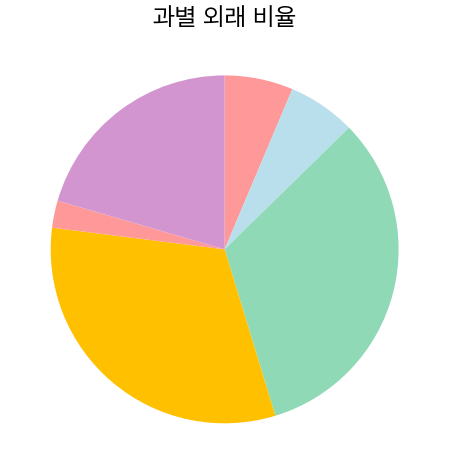

In [171]:
## 데이터 준비
colors = ['#ffc000',"#b9dfec",'#ff9999', '#8fd9b6', '#d395d0','#ff9999'] ## 색상
labels = data2["과"] ## 라벨
frequency = data2["외래"] ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = sorted_colors) ## 색상 지정

ax.set_title('과별 외래 비율',fontsize=25)

total = np.sum(frequency) ## 빈도수 합
 
threshold = 5
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
 
plt.legend(pie[0],sorted_labels) ## 범례
plt.show()